In [16]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### Simple linear classification algorithm

| vector [x,y] 	| label 	|
|--------------	|-------	|
| [ 0.0, 0.7]  	| +1    	|
| [-0.3, -0.5] 	| -1    	|
| [3.0, 0.1]   	| +1    	|
| [-0.1, -1.0] 	| -1    	|
| [-1.0, 1.1]  	| -1    	|
| [2.1, -3.0]  	| +1    	|

We can represent the data as a 2-dimensional numpy array

In [17]:
data = np.array([[ 0.0, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-1.0, 1.1],
                 [ 2.1,-3.0]])

We can represent the labels as a simple numpy array of numbers

In [18]:
labels = np.array([ 1,
                   -1,
                    1,
                   -1,
                   -1,
                   +1])

We can plot the data using the following function:

In [19]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

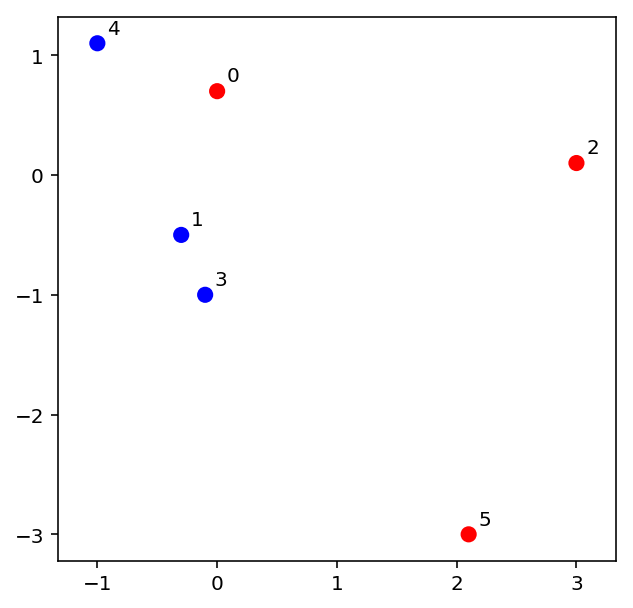

In [20]:
plot_data(data,labels)

This is a function to evaluate the accuracy of the training

In [34]:
def eval_accuracy(data,labels, A,B,C):
    num_correct = 0;
    data_len = data.shape[0]
    
    for i in range(data_len):
        X,Y = data[i]
        current_label = labels[i]  
        output = A*X + B*Y + C
        predicted_label = 1 if output >= 1 else -1 if output <= -1 else 0
        if (predicted_label == current_label):
            num_correct += 1
    return np.round(num_correct / data_len,3)

def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def plot_learning_simple(grid,data,labels,A,B,C,iteration, accuracy):
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j],yy[i][j]
            output = A*X + B*Y + C
            predicted_label = 1 if output >= 1 else -1 if output <= -1 else 0
            Z[i][j] = predicted_label

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Here is the main algorithm.

In [42]:
def train_neural_network(data, labels, step_size, no_loops, iter_info):
    #A, B, and C are parameters of the function F. Here, they are set to 1, -2, -1
    A, B, C = 1, -2, -1
    # this function is used for plotting, it can be ignored
    grid = create_meshgrid(data)
    
    # the main training loop
    for i in range(no_loops):
        # we randomly select the data point, and store its info into: x,y,label
        index = np.random.randint(data.shape[0])
        X,Y = data[index]
        label = labels[index]
        # we calculate the output of the function
        output = A*X + B*Y + C
        # We need to define how to affect the output of our function.
        # If the label is 1 but the output is smaller than 1, we want to maximise.
        # If the label is -1 but the output is larger than -1, we want to minimise.
        sign = 1 if (label == 1 and output < 1) else -1 if (label == -1 and output > -1) else 0
        # partial derivative of dF/dA is X, dF/dB is Y, and of dF/dC is 1. 
        dA, dB, dC = X, Y, 1
        # here we update the parameter values using partial derivatives
        A += dA * sign * step_size
        B += dB * sign * step_size
        C += dC * sign * step_size;
        
        # after a number of iterations, show training accuracy and plot it
        if (i%iter_info==0):
            accuracy = eval_accuracy(data, labels, A,B,C)
            plot_learning_simple(grid,data,labels,A,B,C,i,accuracy)
    # the algorithm returns the learned parameters A, B, and C
    return (A,B,C)

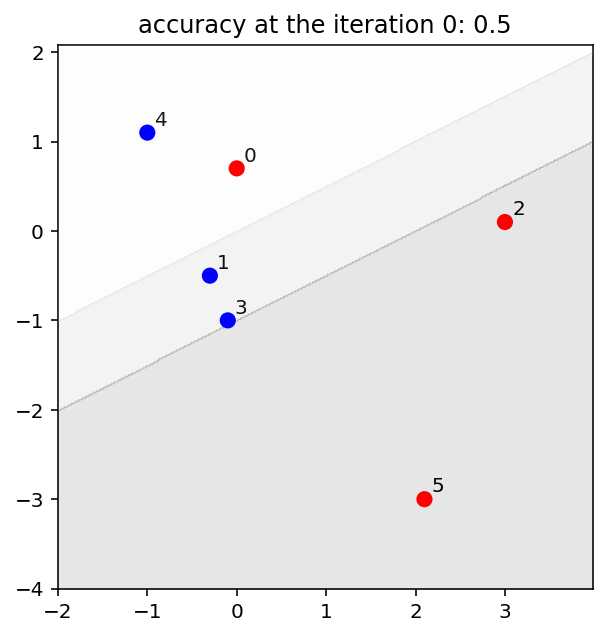

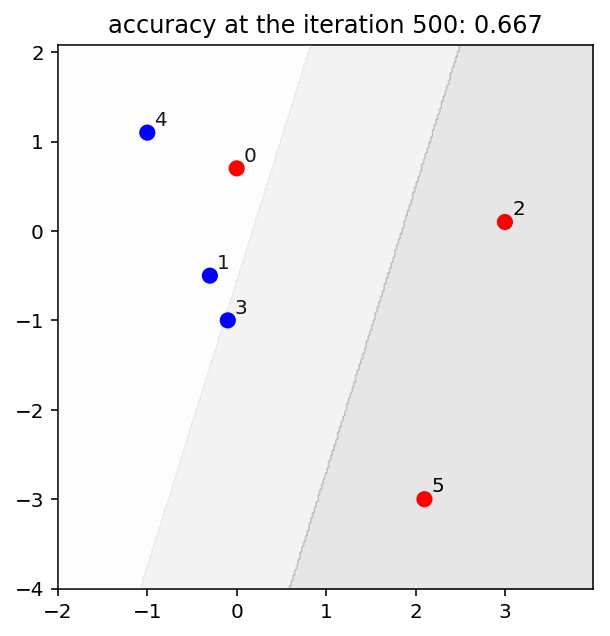

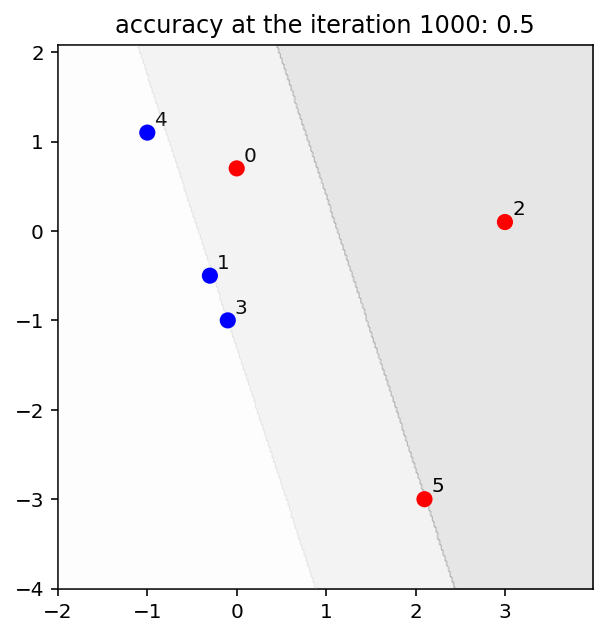

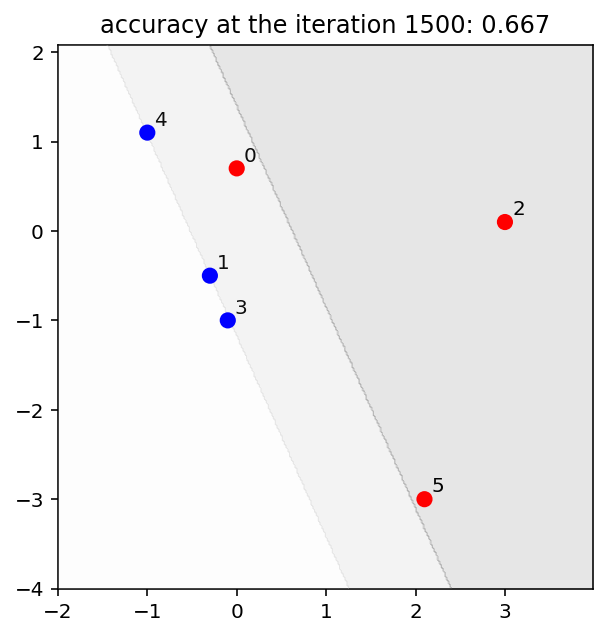

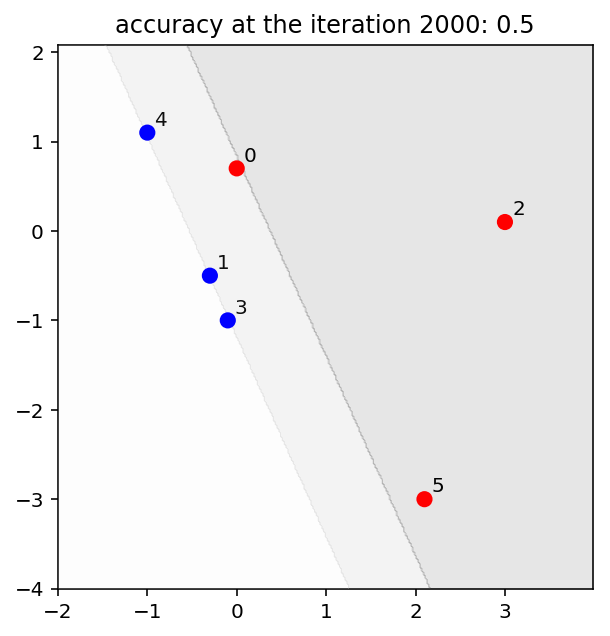

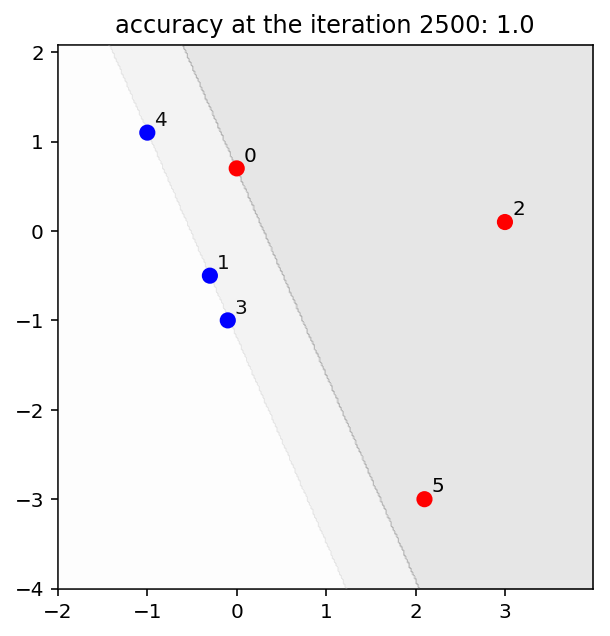

In [44]:
train_1 = train_neural_network(data, labels, 0.01, 2501, 500)

We can inspect the result by comparing the real label of a data point and the predicted label:

In [45]:
def show_prediction(train, data, labels):
    A, B, C = train
    for i in range(data.shape[0]):
        X,Y = data[i]
        label = labels[i]
        output = A*X + B*Y + C
        predicted_label = 1 if output >= 1 else -1 if output <= -1 else 0
        print (f'data point {i}: real label : {label}, pred. label: {predicted_label}, {(label==predicted_label)}')

In [46]:
show_prediction(train_1,data,labels)

data point 0: real label : 1, pred. label: 1, True
data point 1: real label : -1, pred. label: -1, True
data point 2: real label : 1, pred. label: 1, True
data point 3: real label : -1, pred. label: -1, True
data point 4: real label : -1, pred. label: -1, True
data point 5: real label : 1, pred. label: 1, True


---

#### Let's try with a different data set

In [47]:
data2 = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])

In [48]:
labels2 = np.array([ 1,
                    -1,
                     1,
                    -1,
                    -1,
                     1,
                    -1,
                     1,
                    -1,
                    -1])

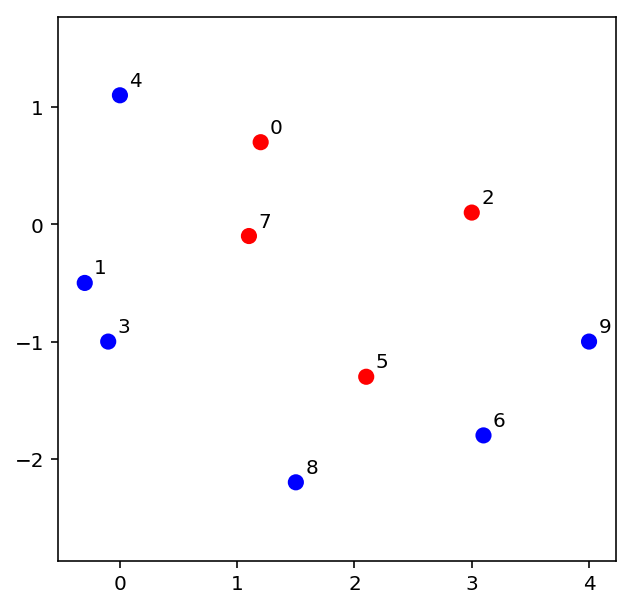

In [49]:
plot_data(data2,labels2)

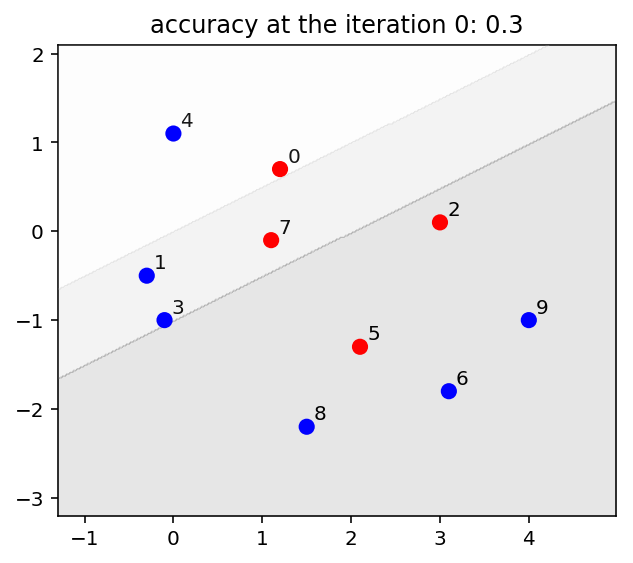

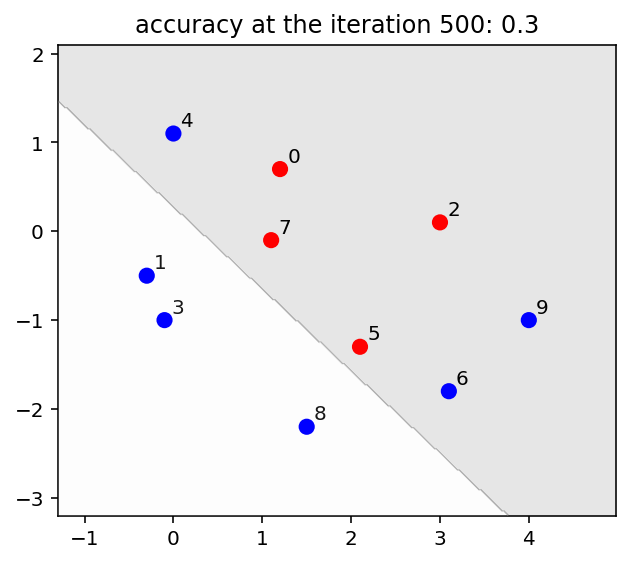

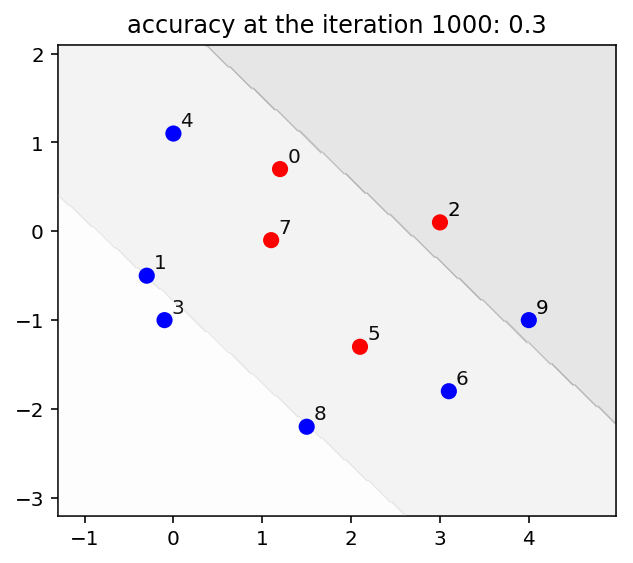

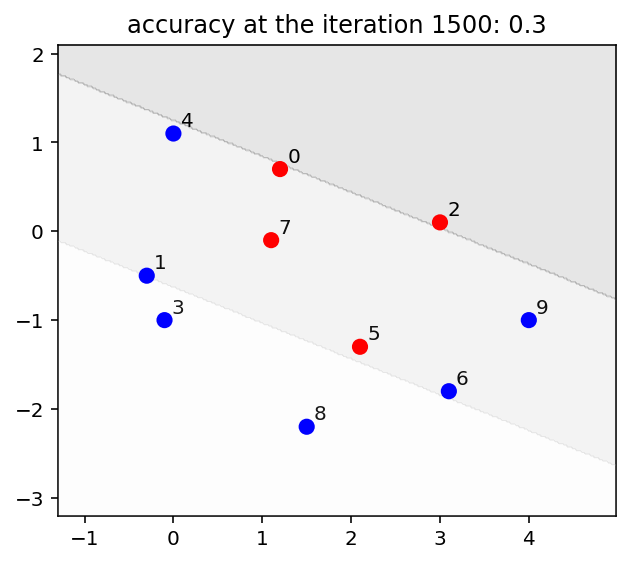

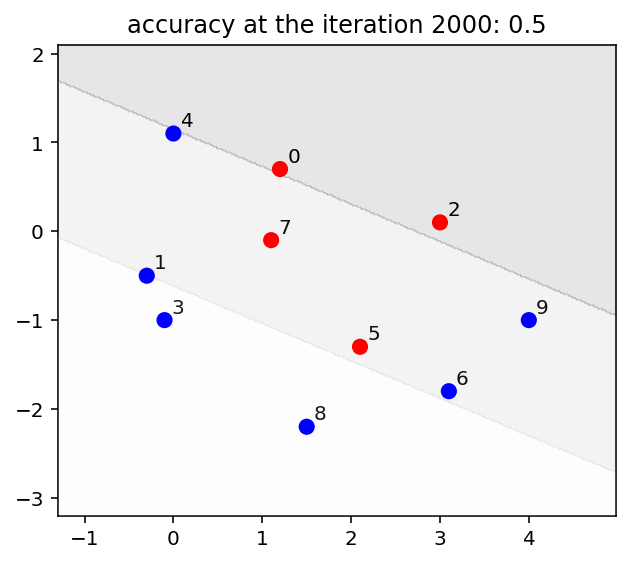

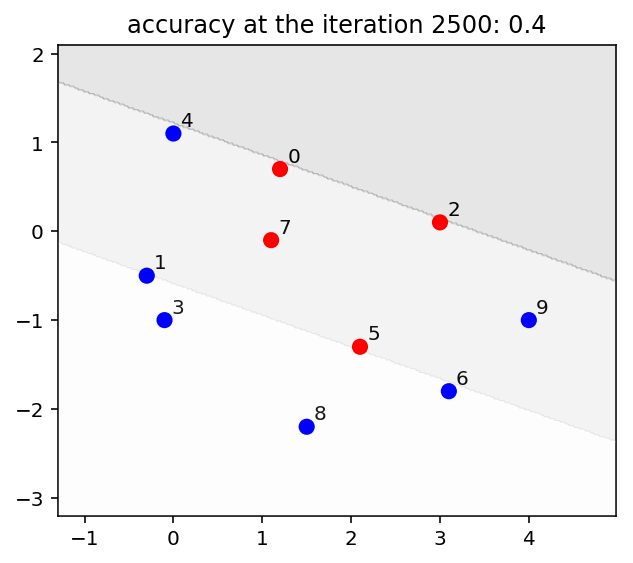

In [50]:
train_2 = train_neural_network(data2, labels2, 0.01, 2501, 500)

In [51]:
show_prediction(train_1,data2,labels2)

data point 0: real label : 1, pred. label: 1, True
data point 1: real label : -1, pred. label: -1, True
data point 2: real label : 1, pred. label: 1, True
data point 3: real label : -1, pred. label: -1, True
data point 4: real label : -1, pred. label: 1, False
data point 5: real label : 1, pred. label: 1, True
data point 6: real label : -1, pred. label: 1, False
data point 7: real label : 1, pred. label: 1, True
data point 8: real label : -1, pred. label: 1, False
data point 9: real label : -1, pred. label: 1, False
